# Docente : Josef Rodriguez
# Masterclass definitiva: Regresión lineal y no lineal  
## Notebook paso a paso (teoría + ejemplos con números + gráficos + industria)

**Objetivo:** que el alumno entienda cada concepto con esta secuencia fija:  
**Definición real → Fórmula → Detalle (por qué) → Ejemplo con manzanitas → Ejemplo industrial → Importancia → Código + gráfico**



---
## 0. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

---
# PARTE 1 — REGRESIÓN LINEAL

## 1) Modelo lineal

### 1. Definición real  
Un **modelo lineal** predice un número (precio, ventas, salario, riesgo) como una **suma ponderada** de variables.

---

### 2. Fórmula  

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
$$

---

### 3. Detalle (qué significa cada término y por qué esa ecuación)

- $\hat{y}$: predicción.  
- $\beta_0$ (intercepto): valor base cuando todos los $x_j = 0$.  
- $\beta_j$: **impacto marginal**.  
  Si $x_j$ aumenta en 1 unidad (manteniendo lo demás constante), entonces $\hat{y}$ cambia en $\beta_j$.  

Se usa esta forma porque es **interpretable**: cada variable contribuye de manera aditiva al resultado.

---

### 4. Ejemplo con números simples  

Salario (S/) según años de experiencia:

$$
\hat{y} = 1200 + 500x
$$

Si $x = 4$:

$$
\hat{y} = 1200 + 500(4) = 1200 + 2000 = 3200
$$

---

### 5. Ejemplo industrial  

Riesgo crediticio aproximado:

$$
\widehat{Riesgo} = 0.02 \cdot Deuda - 0.01 \cdot Ingreso
$$

---

### 6. Importancia  

- Es el estándar cuando necesitas **explicabilidad** (banca, salud, auditoría).  
- Es la base para extensiones como regularización (Ridge, Lasso) y modelos polinomiales.

In [ ]:
#  Código: ejemplo "salario vs experiencia" (fácil, con números entendibles)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)              # experiencia (años)
y = np.array([1500, 2000, 2500, 3000, 3500])              # salario (S/.)

lin = LinearRegression()
lin.fit(X, y)

b0 = lin.intercept_
b1 = lin.coef_[0]

print("Modelo aprendido: y_hat = b0 + b1*x")
print("b0 (intercepto):", b0)
print("b1 (pendiente):", b1)

# Predicción paso a paso para x=4
x_new = np.array([[4]])
y_hat = lin.predict(x_new)[0]
print("\nPredicción para 4 años:", y_hat)

Modelo aprendido: y_hat = b0 + b1*x
b0 (intercepto): 1000.0000000000002
b1 (pendiente): 499.99999999999994

Predicción para 4 años: 3000.0


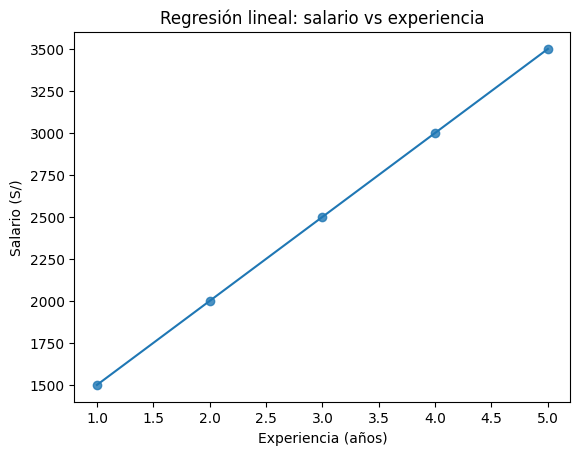

In [ ]:
#  Gráfico: puntos + recta
y_pred = lin.predict(X)

plt.figure()
plt.scatter(X, y, alpha=0.8)
plt.plot(X, y_pred)
plt.xlabel("Experiencia (años)")
plt.ylabel("Salario (S/)")
plt.title("Regresión lineal: salario vs experiencia")
plt.show()

---
## 2) Función de costo (MSE): el “juez” del modelo

### 1. Definición real  
La **función de costo** mide qué tan mal está prediciendo el modelo.  
Entrenar significa **minimizar** ese costo.

---

### 2. Fórmula (MSE)

$$
J(\beta) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

### 3. Detalle (por qué esa ecuación)

- $y_i$ → valor real de la observación $i$  
- $\hat{y}_i$ → predicción del modelo  
- $y_i - \hat{y}_i$ → **residuo (error)**  
- $n$ → número total de observaciones  

Se eleva al cuadrado porque:

1. Evita que errores positivos y negativos se cancelen.  
2. Penaliza mucho más los errores grandes.  
3. Hace la función diferenciable y convexa en regresión lineal.

El factor $\frac{1}{2n}$:

- Normaliza por tamaño del dataset.  
- Simplifica las derivadas cuando aplicamos cálculo.

---

### 4. Ejemplo numérico

Si:

Valor real = 210  
Predicción = 200  

$$
error = 210 - 200 = 10
$$

$$
error^2 = 10^2 = 100
$$

Si el error fuera 50:

$$
error^2 = 50^2 = 2500
$$

Observa cómo el castigo crece de forma cuadrática.

---

### 5. Ejemplo industrial

En pricing:

- Equivocarte por 1 sol puede ser manejable.  
- Equivocarte por 50 soles puede generar pérdidas significativas.

El MSE obliga al modelo a evitar errores grandes.

---

### 6. Importancia

Sin función de costo, el modelo no tiene una meta cuantificable y no puede aprender.

In [ ]:
#  Código: cálculo de errores y MSE sobre el ejemplo salario vs experiencia
residuos = y - y_pred
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print("Residuos (y - y_hat):", residuos)
print("MAE:", mae)
print("MSE:", mse)

Residuos (y - y_hat): [-2.27373675e-13  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
MAE: 4.5474735088646414e-14
MSE: 1.0339757656912847e-26


Tu modelo está prediciendo exactamente los datos de entrenamiento.

Esto puede significar:

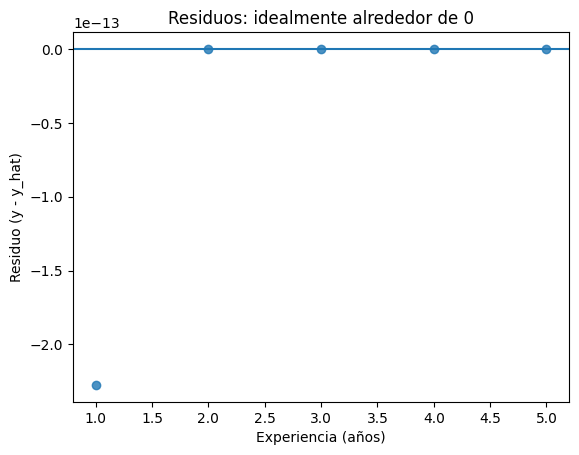

In [ ]:
#  Gráfico: residuos (qué tan lejos está cada punto de la recta)
plt.figure()
plt.scatter(X, residuos, alpha=0.8)
plt.axhline(0)
plt.xlabel("Experiencia (años)")
plt.ylabel("Residuo (y - y_hat)")
plt.title("Residuos: idealmente alrededor de 0")
plt.show()

"Los residuos están prácticamente en cero. Eso significa que el modelo reproduce exactamente los datos. La pequeña diferencia que vemos (10⁻¹³) es solo error numérico del computador."

---
## 3) OLS (Ordinary Least Squares)

### 1. Definición real  
**OLS** (Mínimos Cuadrados Ordinarios) es el método que encuentra los coeficientes $\beta$ que minimizan el MSE **sin penalización**.

---

### 2. Fórmula (solución cerrada)

$$
\beta = (X^{T}X)^{-1} X^{T} y
$$

---

### 3. Detalle (por qué importa)

- $X$ → matriz de variables independientes.  
- $y$ → vector de valores reales.  
- $X^{T}$ → matriz transpuesta.  
- $(X^{T}X)^{-1}$ → inversa de la matriz.

Es una **solución analítica directa**, siempre que la matriz $X^{T}X$ sea invertible.

Problema importante:

Si existe **multicolinealidad** (variables muy correlacionadas), entonces:

$$
X^{T}X
$$

puede volverse casi singular (no invertible), generando coeficientes inestables o muy grandes.

---

### 4. Ejemplo simple

Si “edad” y “años de experiencia” están altamente correlacionadas, el modelo no puede distinguir claramente cuál variable explica el efecto.

Resultado: coeficientes inestables.

---

### 5. Ejemplo industrial

En banca:

- Ingreso  
- Línea de crédito  
- Gasto mensual  

Suelen estar altamente correlacionados.

OLS puede producir coeficientes poco interpretables o extremadamente grandes.

---

### 6. Importancia

- Es el **baseline clásico** en regresión.  
- Punto de comparación para métodos como Ridge y Lasso.  
- Base matemática de muchos modelos posteriores.

In [ ]:
#  Código: demostrar multicolinealidad con un dataset sintético fácil
n = 200
x1 = np.random.normal(size=n)
x2 = x1 + np.random.normal(scale=0.05, size=n)  # casi igual a x1 (altamente correlacionada)
X_mc = np.column_stack([x1, x2])

# y depende realmente de x1
y_mc = 5*x1 + np.random.normal(scale=1.0, size=n)

ols_mc = LinearRegression()
ols_mc.fit(X_mc, y_mc)

print("Correlación entre x1 y x2:", np.corrcoef(x1, x2)[0,1])
print("Coeficientes OLS:", ols_mc.coef_)
print("Intercepto OLS:", ols_mc.intercept_)

Correlación entre x1 y x2: 0.9986246009721964
Coeficientes OLS: [ 5.26238385 -0.40363153]
Intercepto OLS: -0.08968088312465644


## Interpretación de multicolinealidad y coeficientes OLS

### Correlación entre variables

Correlación entre x1 y x2:

0.9986

Esto significa que las variables están casi perfectamente correlacionadas.

Interpretación:

- x1 y x2 contienen prácticamente la misma información.
- Existe **multicolinealidad extrema**.
- La matriz \( X^T X \) está casi singular.
- El modelo no puede distinguir claramente cuál variable explica el efecto.

---

### Coeficientes OLS

Coeficientes estimados:

- \( \beta_1 = 5.2624 \)  
- \( \beta_2 = -0.4036 \)  

Intercepto:

- \( \beta_0 = -0.0897 \)

Observación importante:

Cuando existe multicolinealidad severa:

- Los coeficientes pueden volverse inestables.
- Pueden tomar valores grandes y con signos opuestos.
- Pequeños cambios en los datos pueden generar grandes cambios en los coeficientes.

El modelo puede predecir bien, pero la interpretación individual de cada variable se vuelve poco confiable.

---

### Conclusión conceptual

- El ajuste puede ser bueno.
- Pero la interpretabilidad es débil.
- No podemos afirmar con seguridad cuál variable está explicando realmente el efecto.

Este es un caso clásico donde métodos como **Ridge Regression** suelen mejorar la estabilidad del modelo.

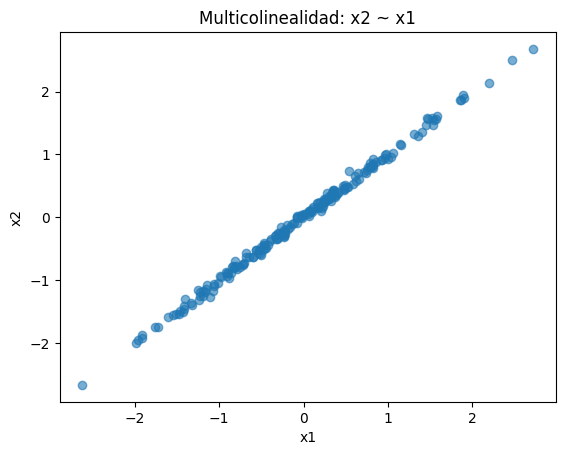

In [ ]:
#  Gráfico: correlación x1 vs x2 (visualiza multicolinealidad)
plt.figure()
plt.scatter(x1, x2, alpha=0.6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Multicolinealidad: x2 ~ x1")
plt.show()

---
## 4) Regularización (concepto general)

### 1. Definición real  
**Regularizar** significa añadir una restricción al modelo para evitar que se vuelva demasiado sensible a los datos (overfitting) y para estabilizar los coeficientes.

---

### 2. Fórmula general  

$$
J(\beta) =
\underbrace{\frac{1}{2n}\| y - X\beta \|^2}_{\text{error}}
+
\lambda \cdot
\underbrace{\Omega(\beta)}_{\text{penalización}}
$$

---

### 3. Detalle

- $\| y - X\beta \|^2$ → error cuadrático (MSE en forma matricial).  
- $\Omega(\beta)$ → término de penalización.  
- $\lambda$ → hiperparámetro que controla la fuerza de la penalización.

Interpretación de $\lambda$:

- $\lambda = 0$ → el modelo vuelve a OLS.  
- $\lambda$ pequeño → leve regularización.  
- $\lambda$ grande → modelo más simple y más estable (coeficientes pequeños).

El tipo de $\Omega(\beta)$ define el modelo:

- Ridge (L2): $\Omega(\beta) = \|\beta\|^2$  
- Lasso (L1): $\Omega(\beta) = \|\beta\|_1$

---

### 4. Ejemplo simple

Es como decir:

“Quiero predecir bien, pero no te permito usar coeficientes gigantes”.

El modelo debe balancear:

- Ajustar bien los datos  
- Mantener coeficientes controlados

---

### 5. Importancia industrial

En producción:

- La estabilidad es más importante que un ajuste perfecto en entrenamiento.  
- Modelos muy complejos pueden fallar cuando cambian los datos reales.  
- La regularización reduce riesgo operacional y mejora generalización.

---
## 5) Ridge Regression (L2)

### 1. Definición real  
**Ridge** es OLS más un castigo por coeficientes grandes.  
Reduce la varianza y estabiliza el modelo cuando existe multicolinealidad.

---

### 2. Fórmula  

$$
J(\beta) = \frac{1}{2n} \| y - X\beta \|^2 + \lambda \| \beta \|_2^2
$$

---

### 3. Detalle (por qué L2)

- $\| y - X\beta \|^2$ → error cuadrático.  
- $\| \beta \|_2^2 = \sum_{j=1}^{p} \beta_j^2$ → norma L2 al cuadrado.  
- $\lambda$ → controla la fuerza de la penalización.

Propiedades clave:

- L2 castiga de manera **suave y continua** los coeficientes grandes.  
- Los coeficientes se encogen, pero **no se vuelven exactamente cero**.  
- El problema sigue siendo convexo → existe un mínimo global único.

---

### 4. Ejemplo simple

Si OLS produce:

$$
\beta = [10, -9]
$$

Ridge podría producir:

$$
\beta = [6, -5]
$$

Los coeficientes se reducen, pero siguen presentes.

---

### 5. Ejemplo industrial

En modelos de riesgo con cientos de variables correlacionadas:

- Ingreso  
- Línea de crédito  
- Gasto mensual  
- Deuda total  

Ridge suele generar coeficientes más estables y menos sensibles a pequeñas variaciones en los datos.

---

### 6. Importancia

Se usa cuando la prioridad es:

- Estabilidad  
- Reducción de varianza  
- Mejor generalización en producción

In [ ]:
#  Código: comparar OLS vs Ridge en el caso multicolineal (x1 ~ x2)
ridge_mc = Ridge(alpha=10.0)   # alpha = lambda (en sklearn)
ridge_mc.fit(X_mc, y_mc)

print("Coeficientes OLS :", ols_mc.coef_)
print("Coeficientes Ridge:", ridge_mc.coef_)

Coeficientes OLS : [ 5.26238385 -0.40363153]
Coeficientes Ridge: [2.41137087 2.29397586]


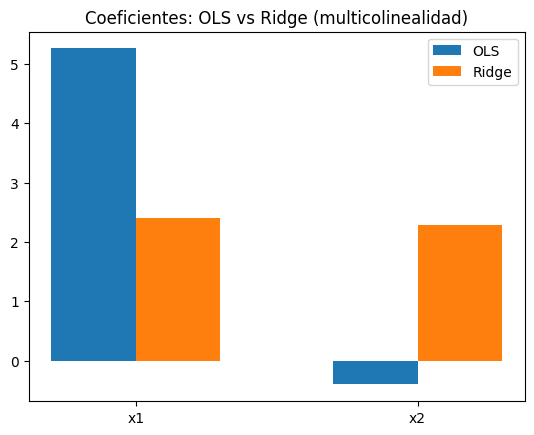

In [ ]:
#  Gráfico: comparar coeficientes en barras (OLS vs Ridge)
labels = ["x1", "x2"]
ols_coef = ols_mc.coef_
ridge_coef = ridge_mc.coef_

xpos = np.arange(len(labels))

plt.figure()
plt.bar(xpos - 0.15, ols_coef, width=0.3, label="OLS")
plt.bar(xpos + 0.15, ridge_coef, width=0.3, label="Ridge")
plt.xticks(xpos, labels)
plt.title("Coeficientes: OLS vs Ridge (multicolinealidad)")
plt.legend()
plt.show()

---
## 6) Lasso Regression (L1)

### 1. Definición real  
**Lasso** es OLS más un castigo L1.  
Además de estabilizar el modelo, puede realizar **selección automática de variables**, porque empuja algunos coeficientes exactamente a cero.

---

### 2. Fórmula  

$$
J(\beta) = \frac{1}{2n} \| y - X\beta \|^2 + \lambda \| \beta \|_1
$$

---

### 3. Detalle (por qué L1)

- $\| \beta \|_1 = \sum_{j=1}^{p} |\beta_j|$  
- $\lambda$ controla la fuerza de la penalización.

Propiedad clave:

La geometría de la norma L1 favorece soluciones donde algunos coeficientes se vuelven exactamente cero.

Resultado:

- Modelo más simple  
- Selección automática de variables  
- Mayor interpretabilidad

---

### 4. Ejemplo simple

Supón que tienes 5 variables, pero solo 2 son realmente relevantes.

Lasso puede producir algo como:

$$
\beta = [4.2, 0, -1.8, 0, 0]
$$

Las variables irrelevantes quedan eliminadas.

---

### 5. Ejemplo industrial

En marketing digital:

- Campañas  
- Horarios  
- Segmentos  
- Tipo de dispositivo  
- Historial de clicks  

Con cientos de variables, Lasso ayuda a identificar cuáles realmente aportan valor predictivo.

---

### 6. Importancia

- Reduce complejidad del modelo  
- Facilita interpretación  
- Disminuye costo computacional en producción  
- Mejora generalización cuando hay muchas variables

In [ ]:
#  Código: dataset donde solo 2 variables importan y el resto es ruido
n = 300
p = 8
X_fs = np.random.normal(size=(n, p))
true_beta = np.array([4.0, -3.0] + [0.0]*(p-2))     # solo x0 y x1 importan
y_fs = X_fs @ true_beta + np.random.normal(scale=1.0, size=n)

ols_fs = LinearRegression().fit(X_fs, y_fs)
ridge_fs = Ridge(alpha=10.0).fit(X_fs, y_fs)
lasso_fs = Lasso(alpha=0.1, max_iter=10000).fit(X_fs, y_fs)

print("True beta :", true_beta)
print("OLS beta  :", np.round(ols_fs.coef_, 3))
print("Ridge beta:", np.round(ridge_fs.coef_, 3))
print("Lasso beta:", np.round(lasso_fs.coef_, 3))

True beta : [ 4. -3.  0.  0.  0.  0.  0.  0.]
OLS beta  : [ 4.082e+00 -3.069e+00  1.400e-02 -3.300e-02  3.000e-02 -7.200e-02
 -2.000e-02  4.000e-03]
Ridge beta: [ 3.952 -2.969  0.014 -0.035  0.026 -0.065 -0.018 -0.012]
Lasso beta: [ 3.985 -2.963  0.    -0.     0.    -0.    -0.    -0.   ]


## Comparación: True β vs OLS vs Ridge vs Lasso

###  Verdaderos coeficientes

True beta:

[ 4, -3, 0, 0, 0, 0, 0, 0 ]

Interpretación:

- Solo las dos primeras variables son relevantes.
- Las demás variables no tienen efecto real.

---

###  OLS

OLS beta:

[ 4.082, -3.069, 0.014, -0.033, 0.030, -0.072, -0.020, 0.004 ]

Interpretación:

- Los coeficientes principales están cerca del valor real.
- Pero aparecen pequeños valores distintos de cero en variables irrelevantes.
- OLS no realiza selección de variables.
- Puede capturar ruido como si fuera señal.

Conclusión:
Buen ajuste, pero introduce coeficientes innecesarios.

---

###  Ridge

Ridge beta:

[ 3.952, -2.969, 0.014, -0.035, 0.026, -0.065, -0.018, -0.012 ]

Interpretación:

- Los coeficientes principales se reducen ligeramente (shrinkage).
- Los coeficientes irrelevantes se hacen más pequeños.
- Pero no se vuelven exactamente cero.

Conclusión:
Mayor estabilidad que OLS, pero no elimina variables.

---

###  Lasso

Lasso beta:

[ 3.985, -2.963, 0, 0, 0, 0, 0, 0 ]

Interpretación:

- Los coeficientes importantes se mantienen cerca del valor real.
- Las variables irrelevantes se vuelven exactamente cero.
- Realiza selección automática de variables.

Conclusión:
Modelo más simple, más interpretable y cercano a la estructura verdadera.

---

###  Conclusión general

- OLS: ajusta bien, pero no controla complejidad.
- Ridge: reduce varianza y estabiliza coeficientes.
- Lasso: reduce varianza y además elimina variables irrelevantes.

En este escenario, donde solo 2 variables son verdaderamente relevantes,
**Lasso recupera mejor la estructura real del modelo.**

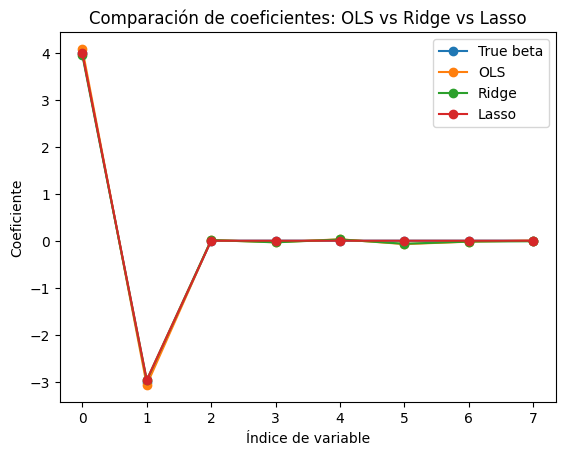

In [ ]:
#  Gráfico: coeficientes (ver ceros en Lasso)
plt.figure()
plt.plot(true_beta, marker="o", label="True beta")
plt.plot(ols_fs.coef_, marker="o", label="OLS")
plt.plot(ridge_fs.coef_, marker="o", label="Ridge")
plt.plot(lasso_fs.coef_, marker="o", label="Lasso")
plt.title("Comparación de coeficientes: OLS vs Ridge vs Lasso")
plt.xlabel("Índice de variable")
plt.ylabel("Coeficiente")
plt.legend()
plt.show()

## Interpretación gráfica: OLS vs Ridge vs Lasso

###  Variables realmente importantes

En el gráfico observamos que:

- La variable 0 tiene coeficiente ≈ 4.
- La variable 1 tiene coeficiente ≈ -3.
- Las demás variables deberían ser 0.

Esto corresponde al vector verdadero:

True beta = [4, -3, 0, 0, 0, 0, 0, 0]

---

###  OLS

Observación en el gráfico:

- Recupera bien los dos coeficientes principales.
- Pero asigna pequeños valores distintos de cero a variables irrelevantes.

Interpretación:

OLS no penaliza complejidad.
Por eso captura algo de ruido como si fuera señal.

---

###  Ridge

Observación:

- Los coeficientes principales están ligeramente reducidos.
- Los coeficientes irrelevantes son pequeños, pero no cero.

Interpretación:

Ridge reduce varianza y estabiliza el modelo.
Encoge coeficientes, pero no elimina variables.

---

###  Lasso

Observación:

- Recupera muy bien los coeficientes reales.
- Hace exactamente cero a las variables irrelevantes.

Interpretación:

Lasso realiza selección automática de variables.
Es el único que recupera la estructura verdadera del modelo.

---

###  Conclusión conceptual

En este experimento:

- OLS ajusta bien pero introduce ruido.
- Ridge estabiliza pero mantiene todas las variables.
- Lasso identifica correctamente cuáles variables importan.

Mensaje clave:

Cuando el problema es disperso (pocas variables relevantes),
Lasso suele aproximar mejor la estructura real.

# Agregar Elastic tarea 


---
# PARTE 2 — REGRESIÓN NO LINEAL

## 7) Regresión polinomial

### 1. Definición real  
Se utiliza cuando la relación entre la variable independiente y la dependiente no es lineal.  
Se agregan términos como $x^2$, $x^3$, etc., para capturar curvatura.

---

### 2. Fórmula  

$$
\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n
$$

---

### 3. Detalle (por qué se sigue llamando “lineal”)

Aunque incluye potencias de $x$, el modelo sigue siendo **lineal en los coeficientes** $\beta$.

Es decir:

$$
\hat{y} = \sum_{j=0}^{n} \beta_j x^j
$$

La linealidad se refiere a los parámetros, no a la forma de la curva.

---

### 4. Ejemplo simple

Relación fertilizante vs cosecha:

- Poco fertilizante → baja cosecha  
- Nivel óptimo → máxima cosecha  
- Exceso → disminuye la cosecha  

Esto puede modelarse como una función cuadrática:

$$
\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2
$$

La forma resultante es una parábola.

---

### 5. Aplicaciones industriales

- Economía (rendimientos decrecientes)  
- Ingeniería (relaciones no lineales físicas)  
- Marketing (saturación publicitaria)

---

### 6. Importancia

Es el primer paso para pasar de una recta a una curva sin perder:

- Interpretabilidad  
- Marco matemático lineal  
- Facilidad de estimación

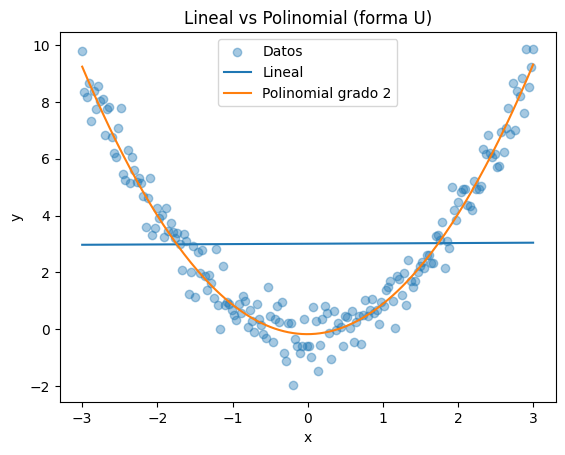

R2 lineal: 5.3787219330359015e-05
R2 poli2 : 0.9595910533659635


In [ ]:
#  Código + gráfico: datos con forma de U (cuadrática) y comparación lineal vs polinomial
X_u = np.linspace(-3, 3, 200).reshape(-1, 1)
y_u = (X_u[:,0]**2) + np.random.normal(scale=0.6, size=len(X_u))  # U + ruido

# Modelo lineal (falla)
lin_u = LinearRegression().fit(X_u, y_u)
y_lin_u = lin_u.predict(X_u)

# Modelo polinomial grado 2 (captura)
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_u_poly = poly2.fit_transform(X_u)      # [x, x^2]
poly_u = LinearRegression().fit(X_u_poly, y_u)
y_poly_u = poly_u.predict(X_u_poly)

plt.figure()
plt.scatter(X_u, y_u, alpha=0.4, label="Datos")
plt.plot(X_u, y_lin_u, label="Lineal")
plt.plot(X_u, y_poly_u, label="Polinomial grado 2")
plt.title("Lineal vs Polinomial (forma U)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("R2 lineal:", r2_score(y_u, y_lin_u))
print("R2 poli2 :", r2_score(y_u, y_poly_u))

## Comparación de desempeño: Modelo Lineal vs Polinomial

### Resultados

R² lineal: 0.0000538  
R² polinomial (grado 2): 0.9596  

---

###  Interpretación del R² lineal

R² ≈ 0

Esto significa:

- El modelo lineal prácticamente no explica la variabilidad de los datos.
- La relación entre X e Y no es una recta.
- El modelo está mal especificado.

Conclusión:
Una recta no es suficiente para capturar la estructura real.

---

###  Interpretación del R² polinomial (grado 2)

R² ≈ 0.96

Esto significa:

- El modelo explica el 96% de la variabilidad.
- La relación probablemente tiene forma cuadrática.
- El modelo ahora está capturando la curvatura.

Conclusión:
Agregar el término \(x^2\) permitió modelar la estructura real.

---

###  Mensaje conceptual importante

El problema no era falta de datos.  
El problema era la forma funcional incorrecta.

Un modelo mal especificado puede tener R² cercano a 0,
aunque la relación sea fuerte.

Cuando la relación es no lineal, un modelo lineal simple falla.

---

###  Lección para producción

Antes de cambiar de algoritmo:

- Revisa la forma funcional.
- Explora gráficos.
- Evalúa transformaciones (polinomios, log, etc.).

Muchas veces el problema no es el algoritmo,
sino la especificación del modelo.

---
## 8) Modelos intrínsecamente no lineales (log / exp)

### 1. Definición real  
Son modelos donde la forma funcional incluye logaritmos o exponenciales.  
Se utilizan cuando existen rendimientos decrecientes (log) o crecimiento acelerado (exp).

---

### 2. Fórmulas típicas

Modelo logarítmico:

$$
\hat{y} = \beta_0 + \beta_1 \ln(x)
$$

Modelo exponencial:

$$
\hat{y} = \beta_0 e^{\beta_1 x}
$$

---

### 3. Detalle

**Modelo logarítmico**

- Los primeros incrementos generan grandes cambios.  
- Luego el efecto marginal disminuye (rendimientos decrecientes).  

Derivada:

$$
\frac{d\hat{y}}{dx} = \frac{\beta_1}{x}
$$

El impacto disminuye a medida que $x$ crece.

---

**Modelo exponencial**

- El crecimiento se acelera con el tiempo.  
- El cambio marginal aumenta conforme crece $x$.

Derivada:

$$
\frac{d\hat{y}}{dx} = \beta_0 \beta_1 e^{\beta_1 x}
$$

El crecimiento es proporcional al nivel actual.

---

### 4. Ejemplos simples

Modelo logarítmico:

Satisfacción vs salario:

- Subir de 1000 a 2000 impacta mucho.  
- Subir de 9000 a 10000 impacta menos.

Modelo exponencial:

Usuarios virales:

- Cada usuario trae más usuarios.  
- El crecimiento se acelera con el tiempo.

---

### 5. Aplicaciones industriales

- Finanzas: interés compuesto  
- Epidemiología: propagación de enfermedades  
- Marketing digital: crecimiento viral  
- Física: procesos de decaimiento o crecimiento exponencial

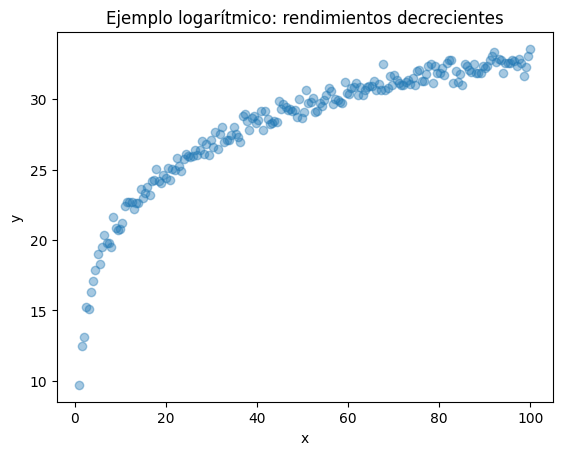

In [ ]:
#  Código + gráfico: ejemplo logarítmico (rendimientos decrecientes)
x = np.linspace(1, 100, 200)
y_log = 10 + 5*np.log(x) + np.random.normal(scale=0.5, size=len(x))

plt.figure()
plt.scatter(x, y_log, alpha=0.4)
plt.title("Ejemplo logarítmico: rendimientos decrecientes")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

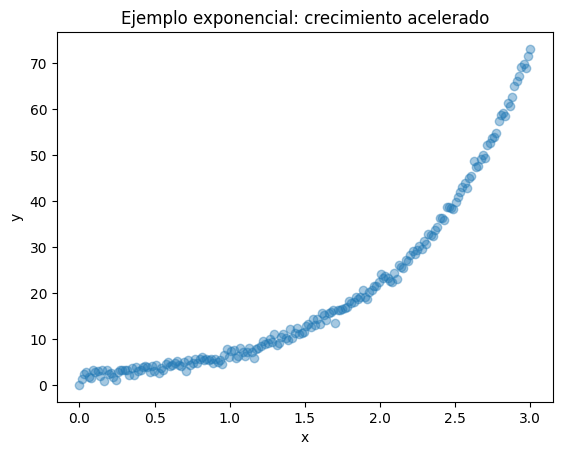

In [ ]:
#  Código + gráfico: ejemplo exponencial (crecimiento acelerado)
x = np.linspace(0, 3, 200)
y_exp = 2*np.exp(1.2*x) + np.random.normal(scale=0.8, size=len(x))

plt.figure()
plt.scatter(x, y_exp, alpha=0.4)
plt.title("Ejemplo exponencial: crecimiento acelerado")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---
## 9) Árboles de decisión para regresión

### 1. Definición real  
Un **árbol de regresión** divide el espacio de variables en regiones mediante reglas del tipo:

$$
x_j \leq c
$$

En cada región, el modelo predice un valor constante, normalmente el promedio de las observaciones en ese nodo.

---

### 2. Lógica de splits  

El árbol selecciona cortes que minimizan el error cuadrático medio dentro de cada grupo.

Formalmente, busca minimizar:

$$
\sum_{m=1}^{M} \sum_{i \in R_m} (y_i - \bar{y}_{R_m})^2
$$

Donde:

- $R_m$ representa la región $m$.
- $\bar{y}_{R_m}$ es el promedio de los valores en esa región.

---

### 3. Detalle

- No asume forma funcional (ni recta ni curva).  
- Captura relaciones no lineales y efectos de umbral.  
- Puede modelar interacciones automáticamente.  
- Riesgo: sobreajuste si el árbol es muy profundo.

El modelo produce predicciones escalonadas (piecewise constant).

---

### 4. Ejemplo simple

Precio de ticket de avión:

- ¿Temporada alta?  
- ¿Faltan menos de 7 días?  
- ¿Es fin de semana?  

Cada combinación lleva a un segmento con un precio promedio estimado.

---

### 5. Aplicaciones industriales

- Pricing dinámico  
- Estimación de demanda  
- Segmentación de clientes  

Además, son la base de modelos más potentes como:

- Random Forest  
- XGBoost  
- LightGBM

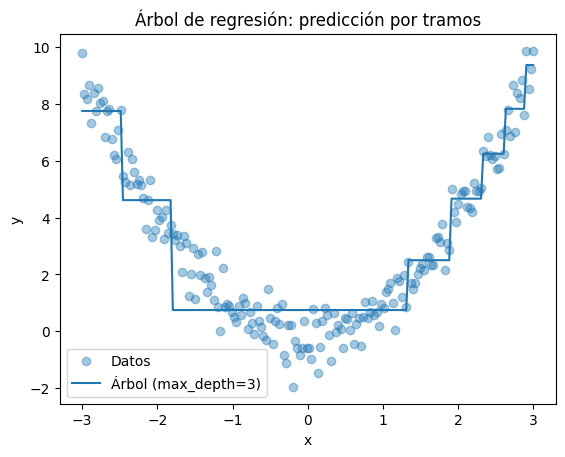

R2 árbol: 0.8963783157858027


In [ ]:
#  Código + gráfico: árbol en datos con U (verás predicción escalonada)
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_u, y_u)
y_tree = tree.predict(X_u)

plt.figure()
plt.scatter(X_u, y_u, alpha=0.4, label="Datos")
plt.plot(X_u, y_tree, label="Árbol (max_depth=3)")
plt.title("Árbol de regresión: predicción por tramos")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("R2 árbol:", r2_score(y_u, y_tree))

---
# PARTE 3 — EL MOTOR: OPTIMIZACIÓN

## 10) Gradiente descendente + tasa de aprendizaje

### 1. Definición real  
El **gradiente descendente** es un algoritmo iterativo para minimizar una función de costo.  
Se utiliza cuando no es conveniente o posible obtener una solución cerrada, o cuando el dataset es muy grande.

---

### 2. Fórmula  

$$
\beta_{t+1} = \beta_t - \eta \nabla J(\beta_t)
$$

---

### 3. Detalle

- $\nabla J(\beta_t)$ → gradiente de la función de costo en el punto actual.  
- Indica la dirección de mayor crecimiento; al restarlo, descendemos.  
- $\eta$ → tasa de aprendizaje (*learning rate*).

Interpretación de $\eta$:

- Muy pequeño → convergencia lenta.  
- Muy grande → puede oscilar o divergir.  

En regresión lineal, la función de costo es convexa, por lo tanto:

- Existe un único mínimo global.  
- No hay mínimos locales que atrapen al algoritmo.

---

### 4. Ejemplo simple

Imagina que estás buscando el fondo de un tazón en la oscuridad.

- Sientes la pendiente con los pies.  
- Das un paso en la dirección donde el terreno baja.  
- Repites hasta llegar al punto más bajo.

Eso es gradiente descendente.

In [ ]:
#  Código: gradiente descendente en una función simple (beta-4)^2
def gradient_descent(beta0, eta, steps=20):
    beta = beta0
    history = []
    for t in range(steps):
        grad = 2*(beta - 4)      # derivada de (beta-4)^2
        beta = beta - eta*grad
        history.append(beta)
    return np.array(history)

hist_slow = gradient_descent(beta0=0, eta=0.05, steps=30)
hist_good = gradient_descent(beta0=0, eta=0.2,  steps=30)
hist_bad  = gradient_descent(beta0=0, eta=0.9,  steps=10)

print("Último beta (eta=0.05):", hist_slow[-1])
print("Último beta (eta=0.2): ", hist_good[-1])
print("Historial (eta=0.9):   ", hist_bad)

Último beta (eta=0.05): 3.8304353668991356
Último beta (eta=0.2):  3.999999115704321
Historial (eta=0.9):    [7.2        1.44       6.048      2.3616     5.31072    2.951424
 4.8388608  3.32891136 4.53687091 3.57050327]


## Interpretación: Gradiente Descendente y Tasa de Aprendizaje

### Resultados

Último beta (η = 0.05): 3.8304  
Último beta (η = 0.2):  3.9999  
Historial (η = 0.9):  
[7.2, 1.44, 6.048, 2.3616, 5.3107, 2.9514, 4.8389, 3.3289, 4.5369, 3.5705]

---

###  η = 0.05 (learning rate pequeño)

Observación:

- Converge lentamente.
- El valor final (3.83) aún no llega exactamente al óptimo (~4).

Interpretación:

- Pasos pequeños.
- Movimiento estable.
- Requiere más iteraciones para alcanzar el mínimo.

Conclusión:
Seguro pero lento.

---

###  η = 0.2 (learning rate moderado)

Observación:

- Converge casi exactamente a 4.
- Estable y rápido.

Interpretación:

- Tamaño de paso adecuado.
- Buen balance entre velocidad y estabilidad.

Conclusión:
Learning rate bien calibrado.

---

###  η = 0.9 (learning rate grande)

Observación del historial:

7.2 → 1.44 → 6.048 → 2.36 → 5.31 → ...

- Oscila alrededor del mínimo.
- No converge suavemente.
- Rebota constantemente.

Interpretación:

El paso es demasiado grande.
El algoritmo sobrepasa el mínimo en cada iteración.

Conclusión:
Learning rate alto genera inestabilidad y posible divergencia.

---

###  Mensaje conceptual clave

- η pequeño → convergencia lenta.
- η adecuado → convergencia rápida y estable.
- η grande → oscilación o divergencia.

El aprendizaje depende tanto del algoritmo como de la elección del hiperparámetro.

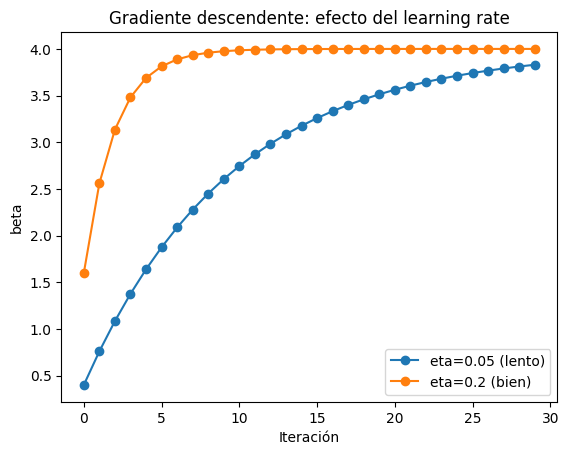

In [ ]:
#  Gráfico: cómo cambia beta con diferentes learning rates
plt.figure()
plt.plot(hist_slow, marker="o", label="eta=0.05 (lento)")
plt.plot(hist_good, marker="o", label="eta=0.2 (bien)")
plt.title("Gradiente descendente: efecto del learning rate")
plt.xlabel("Iteración")
plt.ylabel("beta")
plt.legend()
plt.show()

---
# 11) Comparación final en un dataset “de juguete” (pero realista)

Aquí hacemos lo que suele pedir la industria:  
- separar train/test  
- entrenar varios modelos  
- comparar métricas  
- comparar interpretabilidad vs performance

In [ ]:
#  Dataset sintético realista: y depende de 2 variables + ruido + variables irrelevantes
n = 800
p = 10
X_all = np.random.normal(size=(n, p))

beta_true = np.array([2.5, -1.7] + [0]*(p-2))
y_all = X_all @ beta_true + np.random.normal(scale=1.5, size=n)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

models = {
    "OLS": LinearRegression(),
    "Ridge(alpha=10)": Ridge(alpha=10.0),
    "Lasso(alpha=0.1)": Lasso(alpha=0.1, max_iter=10000)
}

rows = []
for name, m in models.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    rows.append({
        "modelo": name,
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
        "R2": r2_score(y_test, pred),
        "n_coef_~0": int(np.sum(np.isclose(getattr(m, "coef_", np.array([])), 0.0, atol=1e-6)))
    })

pd.DataFrame(rows).sort_values("RMSE")

,modelo,MAE,RMSE,R2,n_coef_~0
0,OLS,1.262754,1.523544,0.799936,0
1,Ridge(alpha=10),1.262860,1.523634,0.799913,0
2,Lasso(alpha=0.1),1.265068,1.530734,0.798044,8


## Comparación de modelos: OLS vs Ridge vs Lasso

| Modelo            | MAE      | RMSE     | R²       | n_coef_~0 |
|------------------|----------|----------|----------|-----------|
| OLS              | 1.2628   | 1.5235   | 0.7999   | 0         |
| Ridge (α=10)     | 1.2629   | 1.5236   | 0.7999   | 0         |
| Lasso (α=0.1)    | 1.2651   | 1.5307   | 0.7980   | 8         |

---

###  Desempeño predictivo

Observaciones:

- Los tres modelos tienen métricas muy similares.
- R² ≈ 0.80 en todos los casos.
- Las diferencias en MAE y RMSE son mínimas.

Interpretación:

La regularización no mejora significativamente el error en este caso.
El problema probablemente no sufre multicolinealidad severa ni alta dimensionalidad crítica.

---

###  Número de coeficientes cercanos a cero

- OLS: 0
- Ridge: 0
- Lasso: 8

Interpretación:

Lasso eliminó 8 variables.
Esto indica que el modelo puede simplificarse sin perder demasiado desempeño.

---

###  Análisis conceptual

OLS:
- Mejor ajuste marginalmente.
- Mantiene todas las variables.
- Mayor complejidad.

Ridge:
- Similar desempeño.
- Mayor estabilidad.
- No elimina variables.

Lasso:
- Desempeño apenas menor.
- Reduce significativamente complejidad.
- Mejora interpretabilidad.

---

###  Conclusión práctica

Cuando el desempeño es similar:

- Si priorizas precisión máxima → OLS.
- Si priorizas estabilidad → Ridge.
- Si priorizas simplicidad e interpretabilidad → Lasso.

En este escenario, Lasso ofrece un modelo más parsimonioso con pérdida mínima de desempeño.

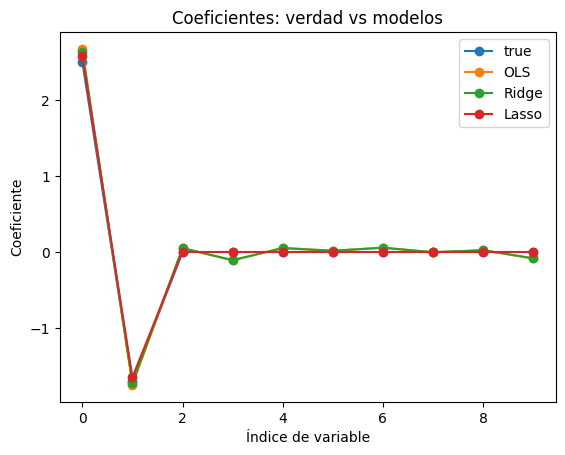

,true,OLS,Ridge,Lasso
0,2.5,2.670712,2.629945,2.576489
1,-1.7,-1.747936,-1.720927,-1.647572
2,0.0,0.049403,0.052210,0.000000
3,0.0,-0.111344,-0.106590,-0.000000
4,0.0,0.055580,0.050335,0.000000
5,0.0,0.017105,0.015776,-0.000000
6,0.0,0.058735,0.055503,0.000000
7,0.0,-0.003581,-0.002477,0.000000
8,0.0,0.021838,0.024342,0.000000
9,0.0,-0.084940,-0.083324,-0.000000


In [ ]:
# git sta Gráfico: coeficientes aprendidos (¿quién hace selección?)
coef_df = pd.DataFrame({
    "true": beta_true,
    "OLS": models["OLS"].coef_,
    "Ridge": models["Ridge(alpha=10)"].coef_,
    "Lasso": models["Lasso(alpha=0.1)"].coef_
})

plt.figure()
plt.plot(coef_df["true"].values, marker="o", label="true")
plt.plot(coef_df["OLS"].values, marker="o", label="OLS")
plt.plot(coef_df["Ridge"].values, marker="o", label="Ridge")
plt.plot(coef_df["Lasso"].values, marker="o", label="Lasso")
plt.title("Coeficientes: verdad vs modelos")
plt.xlabel("Índice de variable")
plt.ylabel("Coeficiente")
plt.legend()
plt.show()

coef_df

---
# 12) Guía de decisión (industrial) TAREA

**¿Qué usar y cuándo?**
- **OLS**: baseline, máxima interpretabilidad, pero sensible a multicolinealidad.  
- **Ridge**: muchas variables correlacionadas, quieres estabilidad.  
- **Lasso**: quieres reducir variables (feature selection), bajar complejidad.  
- **Polinomial**: relación curva (U/S) con sentido físico/económico.  
- **Árboles**: reglas/umbrales, datos con saltos, poca suposición de forma.  
- **Gradiente descendente**: dataset enorme / modelos más complejos; base de deep learning.

**Pregunta final para discusión:**  
> Si tienes 300 variables, muchas correlacionadas, y debes explicar el modelo al regulador: ¿Ridge o Árbol? ¿por qué?